# Point-of-Use Disinfection Technologies <a class="anchor" id="top"></a>

This module is a simple demonstration of the four point-of-use disinfection technologies as described in Elijah et al. All source codes are in the [`pou_disinfection`](https://github.com/QSD-Group/EXPOsan/tree/main/exposan/pou_disinfection) module in the EXPOsan package.

- **Prepared by:**
    
    - [Yalin Li](https://qsdsan.readthedocs.io/en/latest/CONTRIBUTING.html)
    
- **Covered topics:**

    - [1. System Design](#s1)
    - [2. Cost and Environmental Impacts](#s2)
    - [3. Uncertainty and Sensitivity Analyses](#s3)

**Note**

The manuscript is still in preparation.

In [1]:
# This cell is just to show the version of the packages for result consistency
import qsdsan as qs, exposan as es
print(f'This tutorial was made with qsdsan v{qs.__version__}, exposan v{es.__version__}.')

This tutorial was made with qsdsan v1.3.1, exposan v1.3.2.


## System Design <a class="anchor" id="s1"></a>
To check out the system design, we need to first load the system.

In [2]:
from exposan import pou_disinfection as pou
pou.load()

We can then take a look at the four systems and the detailed design.

System A uses chlorination:

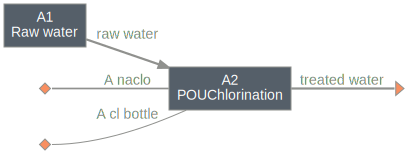

In [3]:
pou.sysA.diagram()

In [4]:
pou.A2.results()

,POUChlorination,Units,A2
Design,PE,kg,150
Purchase cost,WaterContainer,USD,267
Total purchase cost,,USD,267
Utility cost,,USD/hr,0
Additional OPEX,,USD/hr,0


System B uses silver nanoparticle-coated ceramic water filter:

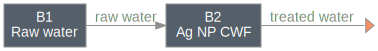

In [5]:
pou.sysB.diagram()

In [6]:
pou.B2.results()

Ag NP CWF                      Units       B2
Design              CWFClay       kg      783
                    SilverNP      kg   0.0107
                    Sawdust       kg      217
                    PE            kg       75
Purchase cost       brush        USD     66.7
                    clay         USD      165
                    grog         USD       30
                    sawdust      USD      150
                    water        USD     3.33
                    wood         USD     83.3
                    labor        USD      922
                    AgNP         USD     18.4
                    Bucket       USD      333
                    Lid          USD      167
                    Spout        USD      167
Total purchase cost              USD 2.11e+03
Utility cost                  USD/hr        0
Additional OPEX               USD/hr  0.00105

System C uses low-pressure UV mercury lamp:

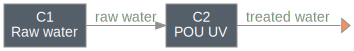

In [7]:
pou.sysC.diagram()

In [8]:
pou.C2.results()

POU UV                           Units       C2
Electricity         Power           kW 4.89e-05
                    Cost        USD/hr 8.31e-06
Design              PE              kg      300
                    PVC             kg     64.1
                    UVlamp          kg      333
                    Aluminum        kg     65.3
Purchase cost       UV unit        USD  1.5e+04
                    UV storage     USD      533
Total purchase cost                USD 1.55e+04
Utility cost                    USD/hr 8.31e-06
UV lamp                         USD/hr    0.013

System D uses UV LED system:

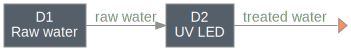

In [9]:
pou.sysD.diagram()

In [10]:
pou.D2.results()

UV LED                               Units       D2
Electricity         Power               kW  0.00187
                    Cost            USD/hr 0.000317
Design              Quartz              kg     38.9
                    PE                  kg      300
                    StainlessSteel      kg      221
                    LED                 kg     1.75
Purchase cost       UV LED unit        USD 4.08e+04
                    UV LED storage     USD      533
Total purchase cost                    USD 4.14e+04
Utility cost                        USD/hr 0.000317
LED                                 USD/hr   0.0026

## Cost and Environmental Impacts <a class="anchor" id="s2"></a>
There is a convenient function to look at the results of techno-economic analysis (TEA) and life cycle assessment (LCA) of the four systems.

In [11]:
pou.print_summaries((pou.sysA, pou.sysB, pou.sysC, pou.sysD))


---------- Summary for sysA ----------


Total cost: 0.06 USD/cap/yr.

Total GWP: 0.08 kg CO2-eq/cap/year.

---------- Summary for sysV ----------


Total cost: 0.50 USD/cap/yr.

Total GWP: 0.05 kg CO2-eq/cap/year.

---------- Summary for sysC ----------


Total cost: 3.70 USD/cap/yr.

Total GWP: 1.83 kg CO2-eq/cap/year.

---------- Summary for sysD ----------


Total cost: 9.58 USD/cap/yr.

Total GWP: 0.74 kg CO2-eq/cap/year.


We can look at the details of the system costs and environmental impacts (the UV lamp system is used as an example, you can repeat for other systems).

In [12]:
print(pou.teaC.EAC) # equivalent annual cost
print(pou.teaC.AOC) # annual operating cost
print(pou.teaC.utility_cost) # electricity and heating (not applicable for this system)
print(pou.teaC.discount_rate)

3701.7613380082153
113.95280708245242
0.07280708245243131
0.05


In [13]:
pou.lcaA.show()

LCA: sysA (lifetime 5 yr)
Impacts:
                 Construction  Transportation  Stream  Others  Total
GWP (kg CO2-eq)           419               0   0.219       0    419


In [14]:
pou.lcaC.get_impact_table('construction')

Quantity Item Ratio GWP [kg CO2-eq] Category GWP Ratio
Construction  SanUnit                                                       
Aluminum [kg] C2          65.3          1             986              0.108
              Total       65.3          1             986              0.108
PE [kg]       C2           300          1             838             0.0917
              Total        300          1             838             0.0917
PVC [kg]      C2          64.1          1             155              0.017
              Total       64.1          1             155              0.017
UVlamp [kg]   C2       7.3e+03          1        7.17e+03              0.784
              Total    7.3e+03          1        7.17e+03              0.784
Sum           All                                9.14e+03                  1

In [15]:
pou.lcaC.get_impact_table('other')

,Quantity,GWP [kg CO2-eq],Category GWP Ratio
Other,,,
Electricity [kWh],1.07,0.122,1
Sum,,0.122,1


We can compare results using different water sources.

In [16]:
print('\n Water Source: Groundwater')
pou.print_summaries(pou.sysC)


 Water Source: Groundwater

---------- Summary for sysC ----------


Total cost: 3.70 USD/cap/yr.

Total GWP: 1.83 kg CO2-eq/cap/year.


In [17]:
print('\n Water Source: Surface Water')
pou.update_water_source(pou.sysC, 'SW')
pou.print_summaries(pou.sysC)


 Water Source: Surface Water

---------- Summary for sysC ----------


Total cost: 3.82 USD/cap/yr.

Total GWP: 3.26 kg CO2-eq/cap/year.


## Uncertainty and Sensitivity Analyses <a class="anchor" id="s3"></a>
We can also run uncertainty and sensitivity analyses.

In [18]:
# Create the model and simulate
modelA = pou.create_model('A')
pou.models.run_uncertainty(modelA, N=1000)

function `run_uncertainty`
Total time: 0:00:04.


We can quickly see the results (aesthetics can be improved if you want).

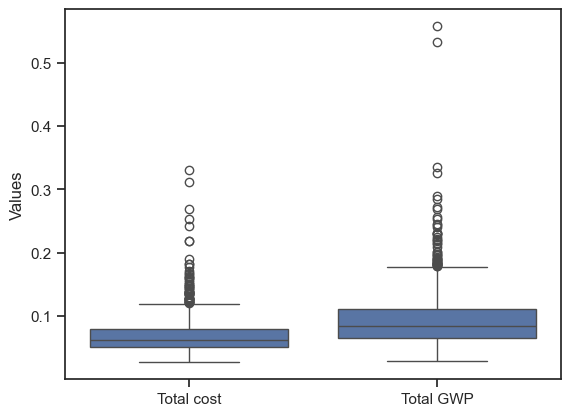

In [19]:
fig, ax = qs.stats.plot_uncertainties(modelA)
fig

Spearman rank correlation:

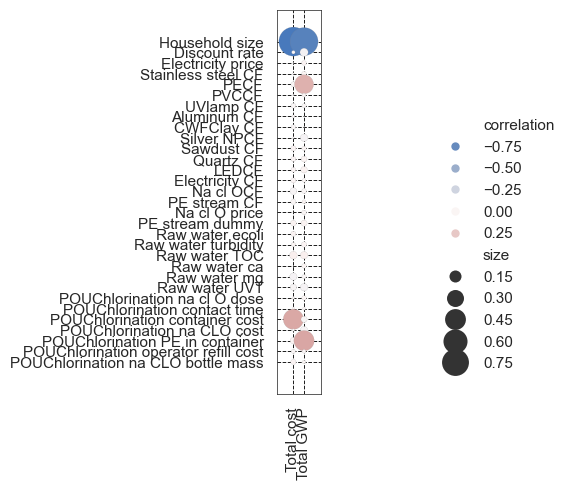

In [20]:
spearman_rho, spearman_p = qs.stats.get_correlations(modelA, kind='Spearman')
fig, ax = qs.stats.plot_correlations(spearman_rho)
fig